<a href="https://colab.research.google.com/github/diana-bsv/basic_knowledge/blob/main/basic_torchvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from tqdm import tqdm

# print(torch.__version__)
# print(torchvision.__version__)

#Dataset


In [2]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download= True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download= True,
    transform = ToTensor(),
    target_transform = None
)


100%|██████████| 26421880/26421880 [00:02<00:00, 10942500.26it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 176521.75it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 545583.43it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5427922.82it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

#Visualize

In [6]:
 image, label = train_data[0]
 image.shape

torch.Size([1, 28, 28])

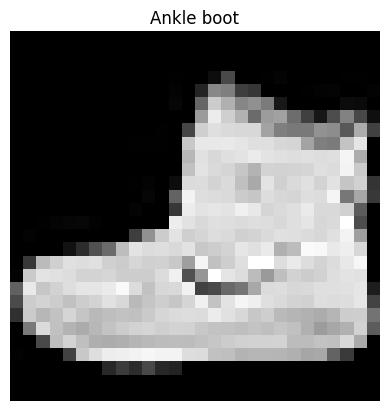

In [7]:
plt.imshow(image.squeeze(), cmap="gray") #removes 1
plt.title(train_data.classes[label]); # ; убирает текстовый аутпут
plt.axis(False);

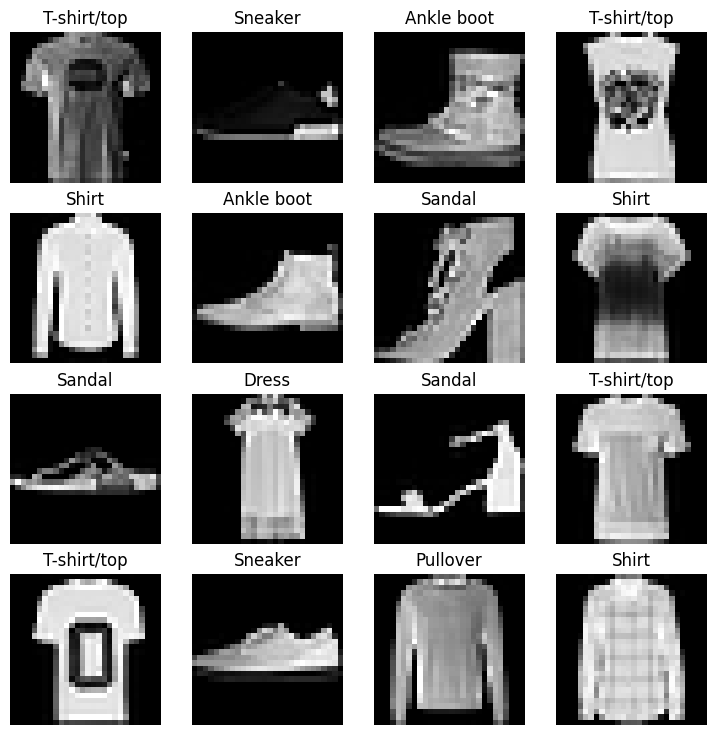

In [8]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    idx = torch.randint(0, len(train_data), [1]).item()
    img, label = train_data[idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray") #removes 1
    plt.title(train_data.classes[label]); # ; убирает текстовый аутпут
    plt.axis(False);

# Dataloader

потому что мы не можем обрабатывать 60к изображений одновременно

In [9]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(train_data,
                              batch_size = batch_size,
                              shuffle = True)


test_dataloader = DataLoader(test_data,
                              batch_size = batch_size,
                              shuffle = False)


In [10]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

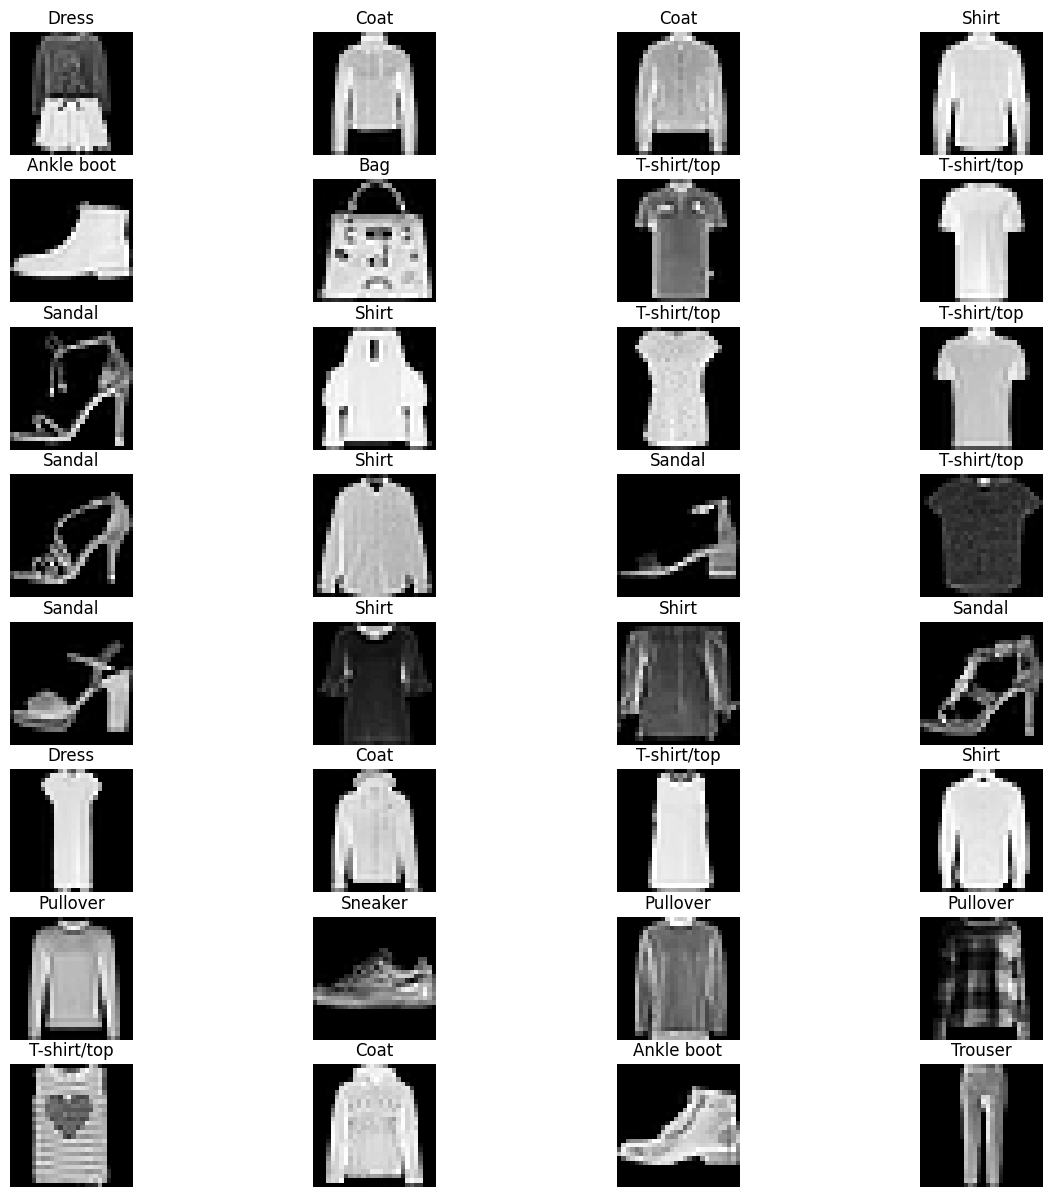

In [12]:
# interact with dataloader

fig = plt.figure(figsize=(15,15))
rows, cols = 8, 4
for i in range(rows*cols):
    img, label = train_features_batch[i], train_labels_batch[i]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img.squeeze(), cmap="gray") #removes 1
    plt.title(train_data.classes[label]); # ; убирает текстовый аутпут
    plt.axis(False);


#Model 0

In [13]:
class Model0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features = input_shape,
                                               out_features = hidden_units),
                                     nn.Linear(in_features = hidden_units,
                                               out_features = output_shape)
                                     )
  def forward(self, x):
    return self.layer_stack(x)

In [14]:
model0 = Model0(input_shape = 28*28,
               hidden_units = 10 ,
               output_shape = 10)
model0.to("cpu")

model0

Model0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [15]:
dummy_x = torch.rand([1,1,28,28]) #check if shape is correct
model0(dummy_x)

tensor([[ 0.1164,  0.2518,  0.1473,  0.2090, -0.5244,  0.4964,  0.4878,  0.1338,
          0.2684,  0.1088]], grad_fn=<AddmmBackward0>)

In [16]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0332, -0.0296, -0.0157,  ...,  0.0061,  0.0004, -0.0075],
                      [ 0.0312, -0.0224,  0.0351,  ..., -0.0014,  0.0120, -0.0215],
                      [-0.0173, -0.0025,  0.0163,  ...,  0.0071, -0.0281, -0.0191],
                      ...,
                      [ 0.0082,  0.0268, -0.0121,  ..., -0.0046, -0.0214,  0.0262],
                      [-0.0290, -0.0259, -0.0143,  ...,  0.0017,  0.0160,  0.0166],
                      [ 0.0296,  0.0132,  0.0330,  ...,  0.0091,  0.0307,  0.0212]])),
             ('layer_stack.1.bias',
              tensor([ 0.0136, -0.0055,  0.0240, -0.0208,  0.0112,  0.0217, -0.0078,  0.0111,
                      -0.0011,  0.0092])),
             ('layer_stack.2.weight',
              tensor([[ 0.1444,  0.2540, -0.2101, -0.1887, -0.1034, -0.0150,  0.1530, -0.0957,
                        0.1695,  0.0723],
                      [-0.1991, -0.0327,  0.1453,  0.1943, -0.0701,  0.0814,  0.

# Loss, optimizer, evaluation metrics (accuracy)

In [17]:
def accuracy(y_true, y_pred):
  return torch.eq(y_true, y_pred).sum().item()/len(y_pred)*100

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(),
                            lr = 0.01)

# Training

In [19]:
torch.manual_seed(42)
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"\nepoch: {epoch}\n------")

  train_loss = 0

  for batch, (x,y) in enumerate(train_dataloader):
    model0.train()

    y_pred = model0(x)

    loss = loss_fn(y_pred, y)

    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"seen {batch*len(x)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  #testing

  test_loss, test_acc = 0, 0
  model0.eval()

  with torch.inference_mode():
    for x_test, y_test in test_dataloader:

      test_pred = model0(x_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")






  0%|          | 0/10 [00:00<?, ?it/s]


epoch: 0
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 10%|█         | 1/10 [00:09<01:25,  9.54s/it]


 Train loss: 0.8906 | Test loss: 0.6531, Test acc: 77.1865

epoch: 1
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 20%|██        | 2/10 [00:18<01:13,  9.24s/it]


 Train loss: 0.5763 | Test loss: 0.5554, Test acc: 80.5212

epoch: 2
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 30%|███       | 3/10 [00:28<01:06,  9.45s/it]


 Train loss: 0.5096 | Test loss: 0.5187, Test acc: 81.9788

epoch: 3
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 40%|████      | 4/10 [00:37<00:56,  9.40s/it]


 Train loss: 0.4779 | Test loss: 0.4945, Test acc: 82.8275

epoch: 4
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 50%|█████     | 5/10 [00:46<00:46,  9.40s/it]


 Train loss: 0.4595 | Test loss: 0.4824, Test acc: 83.1070

epoch: 5
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 60%|██████    | 6/10 [00:56<00:37,  9.39s/it]


 Train loss: 0.4471 | Test loss: 0.4717, Test acc: 83.6362

epoch: 6
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 70%|███████   | 7/10 [01:04<00:27,  9.13s/it]


 Train loss: 0.4384 | Test loss: 0.4648, Test acc: 83.6162

epoch: 7
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 80%|████████  | 8/10 [01:15<00:19,  9.59s/it]


 Train loss: 0.4319 | Test loss: 0.4629, Test acc: 83.6761

epoch: 8
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


 90%|█████████ | 9/10 [01:24<00:09,  9.54s/it]


 Train loss: 0.4265 | Test loss: 0.4598, Test acc: 83.7760

epoch: 9
------
seen 0/60000 samples
seen 12800/60000 samples
seen 25600/60000 samples
seen 38400/60000 samples
seen 51200/60000 samples


100%|██████████| 10/10 [01:34<00:00,  9.44s/it]


 Train loss: 0.4222 | Test loss: 0.4636, Test acc: 83.9257


#Predictions

In [20]:
device = "cpu"

In [21]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn,
               accuracy_fn,
               device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for x, y in data_loader:

      x, y = x.to(device), y.to(device)

      y_pred = model(x)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc":  acc}


In [22]:
model0_results = eval_model(model0, test_dataloader, loss_fn, accuracy)
model0_results

{'model_name': 'Model0',
 'model_loss': 0.4635891616344452,
 'model_acc': 83.92571884984025}

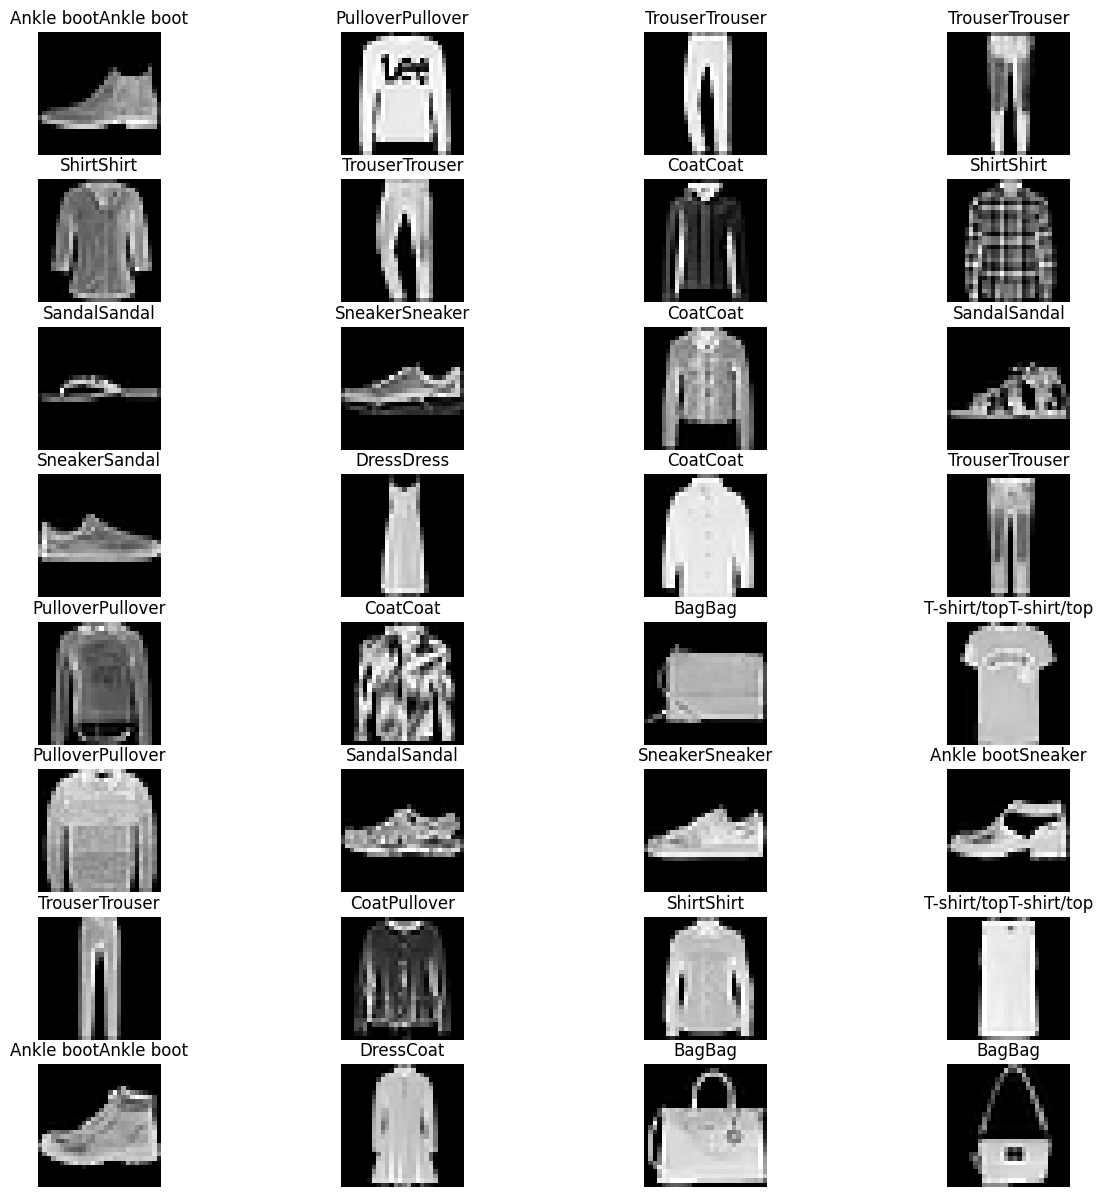

In [27]:
test_features_batch, test_labels_batch = next(iter(test_dataloader))
test_results = model0(test_features_batch)

fig = plt.figure(figsize=(15,15))
rows, cols = 8, 4
for i in range(rows*cols):
    img, label = test_features_batch[i], test_labels_batch[i]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img.squeeze(), cmap="gray") #removes 1
    plt.title(str(train_data.classes[label]) + str(train_data.classes[test_results[i].argmax().item()])) # ; убирает текстовый аутпут
    plt.axis(False);

In [28]:
test_results[0].argmax()

tensor(9)

#GPU
1. It could be that the overhead for copying data/model to and from the GPU
outweighs the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms compute capability than
the GPU.

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [30]:
!nvidia-smi

Wed Oct 23 12:53:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Model 1

In [31]:
class Model1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features = input_shape,
                                               out_features = hidden_units),
                                     nn.ReLU(),
                                     nn.Linear(in_features = hidden_units,
                                               out_features = output_shape),
                                     nn.ReLU()
                                     )
  def forward(self, x):
    return self.layer_stack(x)

In [32]:
torch.manual_seed(42)
model1 = Model1(input_shape = 28*28,
               hidden_units = 10 ,
               output_shape = 10)
model1.to(device)

model1

Model1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [33]:
def accuracy(y_true, y_pred):
  return torch.eq(y_true, y_pred).sum().item()/len(y_pred)*100

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.01)

In [34]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  """Performs a training loop step on model going over data_loader"""

  train_loss = 0
  train_acc = 0

  model.train()


  for batch, (x,y) in enumerate(dataloader):
    x, y = x.to(device), y.to(device)

    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    acc = acc_fn(y_pred.argmax(dim=1), y)

    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")




def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn,
               device: torch.device = device):
  """Performs a testing loop step on model going over data_loader"""

  test_loss, test_acc = 0, 0
  model.eval()

  with torch.inference_mode(): #similar to torch.no_grad()
    for x, y in dataloader:

      x, y = x.to(device), y.to(device)

      test_pred = model(x)

      test_loss += loss_fn(test_pred, y)
      test_acc += acc_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  print(f"\n Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}\n")


In [35]:
torch.manual_seed(42)
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"\nepoch: {epoch}\n------")

  train_step(model1, train_dataloader, loss_fn, accuracy, optimizer, device)

  test_step(model1, train_dataloader, loss_fn, accuracy, device)




  0%|          | 0/10 [00:00<?, ?it/s]


epoch: 0
------
Train loss: 1.42179 | Train acc: 54.28667


 10%|█         | 1/10 [00:17<02:37, 17.55s/it]


 Test loss: 1.10519 | Test acc: 63.05333


epoch: 1
------
Train loss: 1.03357 | Train acc: 64.57500


 20%|██        | 2/10 [00:34<02:19, 17.47s/it]


 Test loss: 0.98050 | Test acc: 65.74333


epoch: 2
------
Train loss: 0.95979 | Train acc: 66.11667


 30%|███       | 3/10 [00:50<01:57, 16.77s/it]


 Test loss: 0.93682 | Test acc: 66.79167


epoch: 3
------
Train loss: 0.92894 | Train acc: 66.63333


 40%|████      | 4/10 [01:07<01:39, 16.56s/it]


 Test loss: 0.91551 | Test acc: 66.94667


epoch: 4
------
Train loss: 0.91092 | Train acc: 67.02667


 50%|█████     | 5/10 [01:22<01:20, 16.18s/it]


 Test loss: 0.90147 | Test acc: 67.31167


epoch: 5
------
Train loss: 0.89800 | Train acc: 67.28333


 60%|██████    | 6/10 [01:38<01:03, 15.94s/it]


 Test loss: 0.88893 | Test acc: 67.47167


epoch: 6
------
Train loss: 0.88886 | Train acc: 67.48667


 70%|███████   | 7/10 [01:54<00:47, 15.98s/it]


 Test loss: 0.87943 | Test acc: 67.83000


epoch: 7
------
Train loss: 0.88123 | Train acc: 67.61167


 80%|████████  | 8/10 [02:12<00:33, 16.70s/it]


 Test loss: 0.88377 | Test acc: 67.52833


epoch: 8
------
Train loss: 0.87442 | Train acc: 67.87167


 90%|█████████ | 9/10 [02:27<00:16, 16.32s/it]


 Test loss: 0.86373 | Test acc: 68.20000


epoch: 9
------
Train loss: 0.86833 | Train acc: 68.00167


100%|██████████| 10/10 [02:43<00:00, 16.40s/it]


 Test loss: 0.86288 | Test acc: 68.05333



In [38]:
model1_results = eval_model(model1, test_dataloader, loss_fn, accuracy, device)
model1_results

{'model_name': 'Model1',
 'model_loss': 0.8968392610549927,
 'model_acc': 66.62340255591054}

#CNN

In [39]:
class CNN(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block1 = nn.Sequential(nn.Conv2d(in_channels = input_shape,
                                               out_channels = hidden_units,
                                               kernel_size = 3,
                                               stride = 1,
                                               padding = 1),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels = hidden_units,
                                               out_channels = hidden_units,
                                               kernel_size = 3,
                                               stride = 1,
                                               padding = 1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size = 2)
                                     )

    self.conv_block2 = nn.Sequential(nn.Conv2d(in_channels = hidden_units,
                                               out_channels = hidden_units,
                                               kernel_size = 3,
                                               stride = 1,
                                               padding = 1),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels = hidden_units,
                                               out_channels = hidden_units,
                                               kernel_size = 3,
                                               stride = 1,
                                               padding = 1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size = 2)
                                     )
    self.classifier = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features = hidden_units*7*7,
                                               out_features = output_shape)
                                     )
  def forward(self, x):
    x = self.conv_block1(x)
    #print(x.shape)
    x = self.conv_block2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [40]:
torch.manual_seed(42)
model2 = CNN(input_shape = 1,
               hidden_units = 10 ,
               output_shape = 10)
model2.to(device)

model2

CNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [41]:
def accuracy(y_true, y_pred):
  return torch.eq(y_true, y_pred).sum().item()/len(y_pred)*100

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters(), lr = 0.01)

In [42]:
torch.manual_seed(42)
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"\nepoch: {epoch}\n------")

  train_step(model2, train_dataloader, loss_fn, accuracy, optimizer, device)

  test_step(model2, train_dataloader, loss_fn, accuracy, device)


  0%|          | 0/10 [00:00<?, ?it/s]


epoch: 0
------
Train loss: 1.03783 | Train acc: 62.33333


 10%|█         | 1/10 [00:18<02:47, 18.59s/it]


 Test loss: 0.59739 | Test acc: 78.36667


epoch: 1
------
Train loss: 0.54780 | Train acc: 80.10500


 20%|██        | 2/10 [00:37<02:28, 18.55s/it]


 Test loss: 0.49688 | Test acc: 81.39000


epoch: 2
------
Train loss: 0.45568 | Train acc: 83.61333


 30%|███       | 3/10 [00:57<02:14, 19.18s/it]


 Test loss: 0.42516 | Test acc: 85.06500


epoch: 3
------
Train loss: 0.41411 | Train acc: 85.15167


 40%|████      | 4/10 [01:15<01:53, 18.85s/it]


 Test loss: 0.39203 | Test acc: 85.97167


epoch: 4
------
Train loss: 0.38706 | Train acc: 86.20000


 50%|█████     | 5/10 [01:33<01:32, 18.46s/it]


 Test loss: 0.37797 | Test acc: 86.36333


epoch: 5
------
Train loss: 0.36756 | Train acc: 86.88833


 60%|██████    | 6/10 [01:51<01:13, 18.48s/it]


 Test loss: 0.35321 | Test acc: 87.47833


epoch: 6
------
Train loss: 0.35187 | Train acc: 87.42167


 70%|███████   | 7/10 [02:09<00:54, 18.22s/it]


 Test loss: 0.34442 | Test acc: 87.62167


epoch: 7
------
Train loss: 0.33993 | Train acc: 87.79667


 80%|████████  | 8/10 [02:27<00:36, 18.33s/it]


 Test loss: 0.33070 | Test acc: 88.23333


epoch: 8
------
Train loss: 0.33036 | Train acc: 88.18500


 90%|█████████ | 9/10 [02:45<00:18, 18.15s/it]


 Test loss: 0.31271 | Test acc: 88.89833


epoch: 9
------
Train loss: 0.32058 | Train acc: 88.49667


100%|██████████| 10/10 [03:04<00:00, 18.42s/it]


 Test loss: 0.30041 | Test acc: 89.31500



In [44]:
model2_results = eval_model(model2, test_dataloader, loss_fn, accuracy, device)
model2_results

{'model_name': 'CNN',
 'model_loss': 0.3438493311405182,
 'model_acc': 87.65974440894568}

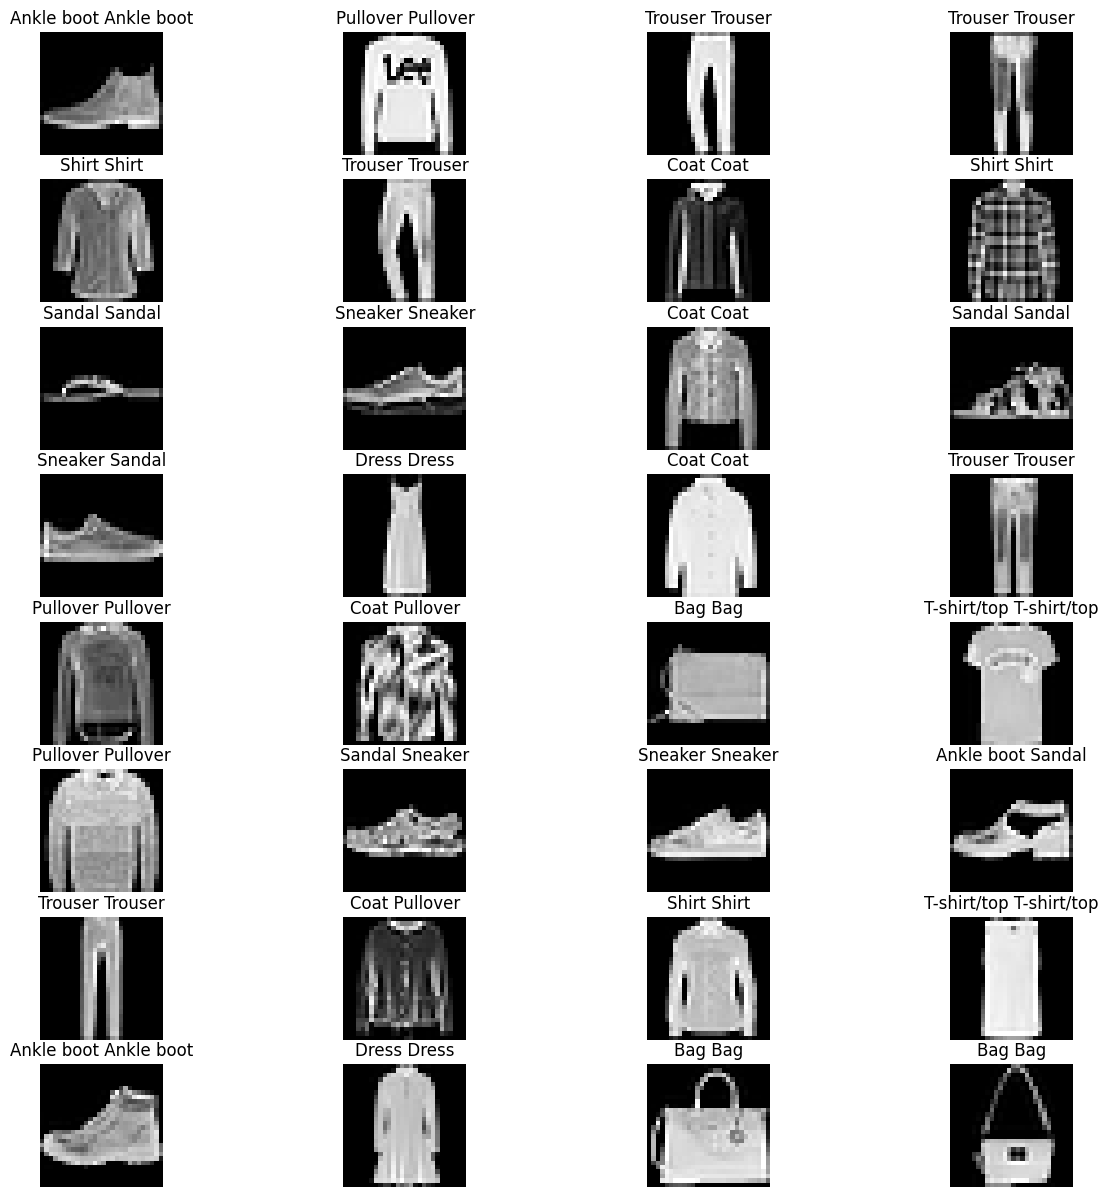

In [45]:
test_features_batch, test_labels_batch = next(iter(test_dataloader))
test_results = model2(test_features_batch.to(device))

fig = plt.figure(figsize=(15,15))
rows, cols = 8, 4
for i in range(rows*cols):
    img, label = test_features_batch[i], test_labels_batch[i]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img.squeeze(), cmap="gray") #removes 1
    plt.title(train_data.classes[label] + " " + train_data.classes[test_results[i].argmax().item()]); # ; убирает текстовый аутпут
    plt.axis(False);

In [46]:
model1_results

{'model_name': 'Model1',
 'model_loss': 0.8968392610549927,
 'model_acc': 66.62340255591054}

In [47]:
import pandas as pd

results = pd.DataFrame([model0_results,
                        model1_results,
                        model2_results])
results

,model_name,model_loss,model_acc
0,Model0,0.463589,83.925719
1,Model1,0.896839,66.623403
2,CNN,0.343849,87.659744


In [48]:
y_preds = []
model2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader):
    x,y = x.to(device), y.to(device)

    y_logit = model2(x)

    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())
  #print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]

100%|██████████| 313/313 [00:01<00:00, 254.60it/s]


In [49]:
try:
  import torchmetrics
  print("imported")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics
  print("imported")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 48.4 MB/s eta 0:00:00
imported


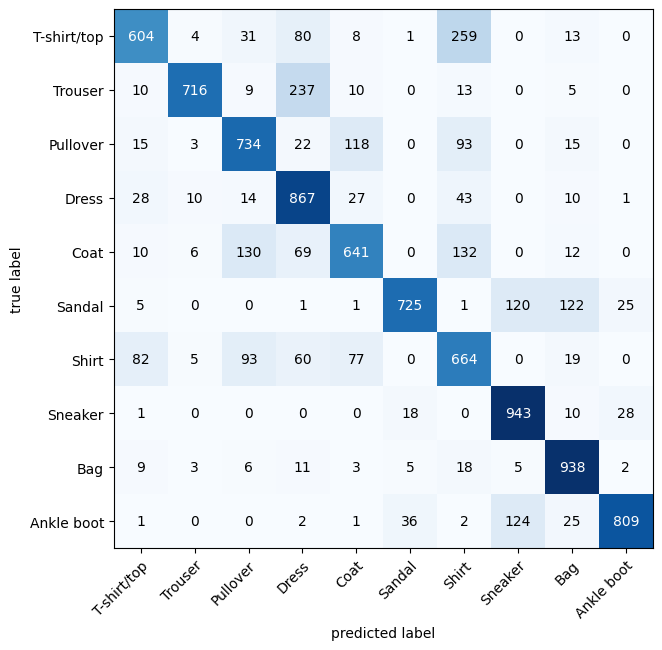

In [50]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = 10, task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = train_data.classes,
                                figsize = (10,7))

In [51]:
confmat_tensor


tensor([[604,   4,  31,  80,   8,   1, 259,   0,  13,   0],
        [ 10, 716,   9, 237,  10,   0,  13,   0,   5,   0],
        [ 15,   3, 734,  22, 118,   0,  93,   0,  15,   0],
        [ 28,  10,  14, 867,  27,   0,  43,   0,  10,   1],
        [ 10,   6, 130,  69, 641,   0, 132,   0,  12,   0],
        [  5,   0,   0,   1,   1, 725,   1, 120, 122,  25],
        [ 82,   5,  93,  60,  77,   0, 664,   0,  19,   0],
        [  1,   0,   0,   0,   0,  18,   0, 943,  10,  28],
        [  9,   3,   6,  11,   3,   5,  18,   5, 938,   2],
        [  1,   0,   0,   2,   1,  36,   2, 124,  25, 809]])

#Save and load

In [52]:
from pathlib import Path

#model directory path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

#create model save

MODEL_NAME = "pytorch_cv.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


#save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/pytorch_cv.pth


In [53]:
# create a new instance
torch.manual_seed(42)

loaded_model2 = CNN(input_shape = 1,
                    hidden_units = 10,
                    output_shape = 10)

#load in the save state_dict()
loaded_model2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

#send the model to the target device
loaded_model2.to(device)

<ipython-input-53-9023019726fe>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


CNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [55]:
loaded_model2_results = eval_model(model2, test_dataloader, loss_fn, accuracy, device)
loaded_model2_results

{'model_name': 'CNN',
 'model_loss': 0.3438493311405182,
 'model_acc': 87.65974440894568}

In [57]:
model2_results

{'model_name': 'CNN',
 'model_loss': 0.3438493311405182,
 'model_acc': 87.65974440894568}